# Salary Predictions Based on Job Descriptions

In [5]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#your info here
__author__ = "Albert Ntiri"
__email__ = "albert.ntiri@gmail.com"

## Define Classes

In [43]:
class process_data():
    def __init__(self):
        self.data = pd.DataFrame()
    
    def load_data(self, filepath):
        data = pd.read_csv(filepath)
        self.data = data
    
    def clean_data(self):
        self.data.drop(index = data[data.salary == 0].index, axis = 0, inplace = True)
    
    def engineer_features(self):
        self.data['jobLevel'] = self.data.jobType.map(job_levels)
        self.data['degreeLevel'] = self.data.degree.map(degree_levels)
#         self.data['majorInd'] = self.data.major.map(convert_to_bool)
        self.data = pd.get_dummies(self.data, columns=['industry'], drop_first=True)
        self.data = pd.get_dummies(self.data, columns=['major']).drop('major_NONE', axis=1)
#         preprocessing.Normalizer(norm='max').transform(self.data.yearsExperience)
    
    def convert_to_bool(self):
        if string == 'NONE':
            return 0
        else:
            return 1

In [44]:
training_data = process_data()
training_data.load_data('data/train_features.csv')
# training_data.convert_to_bool()
training_data.engineer_features()
training_data.data

,jobId,companyId,jobType,degree,yearsExperience,milesFromMetropolis,jobLevel,degreeLevel,industry_EDUCATION,industry_FINANCE,...,industry_SERVICE,industry_WEB,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_PHYSICS
0,JOB1362684407687,COMP37,CFO,MASTERS,10,83,6,3,0,0,...,0,0,0,0,0,0,0,0,1,0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,3,73,7,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,10,38,5,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,8,17,4,4,0,0,...,0,0,0,0,1,0,0,0,0,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,8,16,5,2,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,19,94,5,2,0,0,...,0,0,0,0,1,0,0,0,0,0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,12,35,6,1,0,1,...,0,0,0,0,0,0,0,0,0,0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,16,81,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
999998,JOB1362685407685,COMP3,CFO,MASTERS,6,5,6,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
class model():
    def __init__(self):
        pass
    
    def build_model(self, data, model_name, model_type, features, test_size=.2):
        features_train, features_test, salary_train, salary_test = train_test_split(data[features], data['salary'], test_size=test_size)

        model = model_type.fit(features_train, salary_train)
        training_r2 = model.score(features_train, salary_train)

        predicted_salary = model.predict(features_test)
        test_r2 = r2_score(y_true=salary_test, y_pred=predicted_salary)
        mse = mean_squared_error(y_true=salary_test, y_pred=predicted_salary)

        model_comparison.loc[model_name] = [training_r2, test_r2, mse]
        
        return model
    
    def predict(self, data, model):
        predictions = model.predict(data)
        return predictions

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [28]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [29]:
train_full.jobType.unique()

array(['CFO', 'CEO', 'VICE_PRESIDENT', 'MANAGER', 'JUNIOR', 'JANITOR',
       'CTO', 'SENIOR'], dtype=object)

In [22]:
# Create joblevel feature as a numeric, hierarchical representation of jobType

job_levels = {
    'JANITOR': 1,
    'JUNIOR': 2,
    'SENIOR': 3,
    'MANAGER': 4,
    'VICE_PRESIDENT': 5,
    'CFO': 6,
    'CTO': 6,
    'CEO': 7
}

train_full['jobLevel'] = train_full.jobType.map(job_levels)
train_full.head()

In [31]:
train_full.degree.unique()

array(['MASTERS', 'HIGH_SCHOOL', 'DOCTORAL', 'BACHELORS', 'NONE'],
      dtype=object)

In [24]:
# Create degreeLevel feature as a numeric, hierarchial representation of degree

degree_levels = {
    'NONE': 0,
    'HIGH_SCHOOL': 1,
    'BACHELORS': 2,
    'MASTERS': 3,
    'DOCTORAL': 4
}

train_full['degreeLevel'] = train_full.degree.map(degree_levels)
train_full.head()

In [33]:
# Convert industry into numeric indicators using one-hot encoding, using Auto as a baseline and merge with full training set

industry_ind = pd.get_dummies(train_full.industry, drop_first=True)
train_full = pd.merge(train_full, industry_ind, left_index=True, right_index=True)
train_full.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobLevel,degreeLevel,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,6,3,0,0,1,0,0,0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,7,1,0,0,0,0,0,1
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,5,4,0,0,1,0,0,0
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,4,4,0,0,0,0,0,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,5,2,0,1,0,0,0,0


In [34]:
# Convert major into numeric indicators using one-hot encoding, using None as a baseline and merge with full training set

major_ind = pd.get_dummies(train_full.major)
major_ind.drop('NONE', axis=1, inplace=True)
train_full = pd.merge(train_full, major_ind, left_index=True, right_index=True)
train_full.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobLevel,...,SERVICE,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,PHYSICS
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,6,...,0,0,0,0,0,0,0,0,1,0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,7,...,0,1,0,0,0,0,0,0,0,0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,5,...,0,0,0,0,0,0,0,0,0,1
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,4,...,0,0,0,0,1,0,0,0,0,0
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,5,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Create majorInd feature as a boolean

def convert_to_bool(string):
    if string == 'NONE':
        return 0
    else:
        return 1

train_full['majorInd'] = train_full.major.map(convert_to_bool)
train_full

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,jobLevel,...,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,PHYSICS,majorInd
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,6,...,0,0,0,0,0,0,0,1,0,1
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101,7,...,1,0,0,0,0,0,0,0,0,0
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137,5,...,0,0,0,0,0,0,0,0,1,1
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142,4,...,0,0,0,1,0,0,0,0,0,1
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163,5,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88,5,...,0,0,0,1,0,0,0,0,0,1
999991,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160,6,...,0,0,0,0,0,0,0,0,0,0
999992,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64,2,...,0,0,0,0,0,0,0,0,0,0
999993,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149,6,...,0,0,0,0,0,0,0,0,0,0


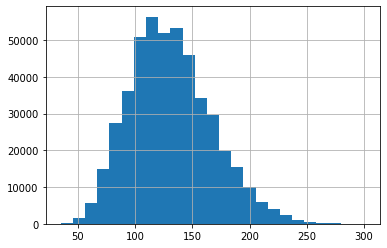

In [36]:
train_full.loc[train_full.majorInd == True, 'salary'].hist(bins=25)

In [37]:
# Write a function to perform data cleaning steps

def clean_data(data):
    # Drop rows from training features data set.
    data.drop(index = data[data.salary == 0].index, axis = 0, inplace = True)
    return data

In [38]:
# Write a function to do all of the cleaning and feature engineering steps

def engineer_features(data):
        
    data['jobLevel'] = data.jobType.map(job_levels)
    data['degreeLevel'] = data.degree.map(degree_levels)
    data['majorInd'] = data.major.map(convert_to_bool)
    data = pd.get_dummies(data, columns=['industry'], drop_first=True)
    data = pd.get_dummies(data, columns=['major']).drop('major_NONE', axis=1)
    return data

In [39]:
# Filter to include columns that will go into the model
model_features = ['jobLevel', 'degreeLevel', 'yearsExperience', 'milesFromMetropolis', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB', 'BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'PHYSICS']
# model_features = ['jobLevel', 'degreeLevel', 'yearsExperience', 'milesFromMetropolis', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB', 'majorInd']
model_columns = model_features + ['salary']
model_train_full = train_full[model_columns]
model_train_full.head()

,jobLevel,degreeLevel,yearsExperience,milesFromMetropolis,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,PHYSICS,salary
0,6,3,10,83,0,0,1,0,0,0,0,0,0,0,0,0,1,0,130
1,7,1,3,73,0,0,0,0,0,1,0,0,0,0,0,0,0,0,101
2,5,4,10,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,137
3,4,4,8,17,0,0,0,0,0,0,0,0,1,0,0,0,0,0,142
4,5,2,8,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,163


### ---- 8 Create models ----

In [40]:
#create and tune the models that you brainstormed during part 2

In [41]:
# Split data into training and test sets

features_train, features_test, salary_train, salary_test = train_test_split(model_train_full[model_features], model_train_full['salary'], test_size=.2)
features_train

,jobLevel,degreeLevel,yearsExperience,milesFromMetropolis,EDUCATION,FINANCE,HEALTH,OIL,SERVICE,WEB,BIOLOGY,BUSINESS,CHEMISTRY,COMPSCI,ENGINEERING,LITERATURE,MATH,PHYSICS
31137,1,1,18,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0
951415,7,0,22,71,0,0,0,0,1,0,0,0,0,0,0,0,0,0
450989,1,0,22,73,0,0,1,0,0,0,0,0,0,0,0,0,0,0
795475,6,3,20,54,0,1,0,0,0,0,0,0,0,0,1,0,0,0
897507,7,0,14,24,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648970,2,0,14,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0
805540,6,1,12,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0
884003,2,1,16,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0
651585,6,3,21,53,0,0,0,0,0,1,0,0,0,1,0,0,0,0


#### Linear Regression

In [42]:
# Fit model on the training data

linearmodel = linear_model.LinearRegression()
linearmodel.fit(features_train, salary_train)
print(linearmodel.coef_)
print(linearmodel.score(features_train, salary_train))

[ 10.22032314   4.90407998   2.01104799  -0.39986438 -10.03320602
  21.08680589   6.22409738  21.27516541  -5.04844006  12.09762241
   5.59941193  13.28297771   6.74767628   9.76175968  16.22046995
   1.99316841  10.77359955   7.92228549]
0.7432556461339996


#### Lasso & Ridge Regression

In [43]:
lasso = linear_model.Lasso()
gridl = GridSearchCV(lasso, {'alpha':[.01,.1,.2,.5,1]})
gridl.fit(features_train, salary_train)
gridl.best_params_

{'alpha': 0.01}

In [44]:
lasso = linear_model.Lasso(alpha=.01).fit(features_train, salary_train)
print(lasso.coef_)
print(lasso.score(features_train, salary_train))

[ 10.22920572   5.11553629   2.01086079  -0.39985203 -10.10934462
  20.87219917   6.00952645  21.05914702  -5.12218648  11.88286917
   4.79944075  12.48149829   5.9492555    8.96261171  15.42206997
   1.19248208   9.97114849   7.12278002]
0.7432094284871693


In [45]:
ridge = linear_model.Ridge(normalize=True)
gridr = GridSearchCV(ridge, {'alpha':[.01,.1,.2,.5,1]})
gridr.fit(features_train, salary_train)
gridr.best_params_

{'alpha': 0.01}

In [46]:
ridge = linear_model.Ridge(normalize=True, alpha=.01).fit(features_train, salary_train)
print(ridge.coef_)
print(ridge.score(features_train, salary_train))

[ 10.12358286   4.9049832    1.99119929  -0.39591583 -10.31459345
  20.54244979   5.80517645  20.72932448  -5.37177794  11.62847655
   5.5555715   13.16508058   6.69307886   9.6780142   16.07441539
   1.98241692  10.68238994   7.85563789]
0.7431840588909879


#### Stochastic Gradient Descent

In [47]:
SGD = linear_model.SGDRegressor(penalty='l1', alpha=.01, max_iter=1000).fit(features_train, salary_train)
print(SGD.coef_)
print(SGD.score(features_train, salary_train))

[ 10.18956703   5.14682574   2.06606509  -0.44246509 -10.10483257
  20.83443547   6.1283451   21.08015887  -5.17498969  11.84466059
   4.68813473  12.66185429   5.82696714   9.13428832  15.50757212
   1.18704202   9.977386     7.0263958 ]
0.7402415917065401


#### Decision Tree with Gradient Boosting

In [48]:
GB = GradientBoostingRegressor(n_estimators=500, max_depth=6).fit(features_train, salary_train)
print(GB.score(features_train, salary_train))

0.7680648546163935


### ---- 9 Test models ----

In [49]:
#do 5-fold cross validation on models and measure MSE

In [50]:
# Run linear regression model on test data

predicted_salary_test = linearmodel.predict(features_test)
predicted_salary_test

array([114.67262729,  94.55526699, 165.44003842, ...,  56.77552026,
       122.119429  ,  39.09049395])

In [51]:
# Calculate R^2 and MSE scores on linear regression model

print(mean_squared_error(y_true=salary_test, y_pred=predicted_salary_test))
print(r2_score(y_true=salary_test, y_pred=predicted_salary_test))

384.6841650045148
0.742791186806194


In [52]:
# Combine into 1 cell and wrap into a function for multiple models

def build_model(model_name, model_type, features, test_size=.2):
    features_train, features_test, salary_train, salary_test = train_test_split(train_full[features], train_full['salary'], test_size=test_size)
    
    model = model_type.fit(features_train, salary_train)
    training_r2 = model.score(features_train, salary_train)
    
    predicted_salary = model.predict(features_test)
    test_r2 = r2_score(y_true=salary_test, y_pred=predicted_salary)
    mse = mean_squared_error(y_true=salary_test, y_pred=predicted_salary)
    
    model_comparison.loc[model_name] = [training_r2, test_r2, mse]

In [53]:
# Set up model comparison dataframe and initialize different models

model_comparison = pd.DataFrame(columns=['Training_R2', 'Test_R2', 'Mean_Squared_Error'])
lin_reg = linear_model.LinearRegression(normalize=True)
lasso_reg = linear_model.Lasso(alpha=.01)
ridge_reg = linear_model.Ridge(normalize=True, alpha=.01)
SGD_reg = linear_model.SGDRegressor(penalty='l1', alpha=.01, max_iter=1000)
GB_reg = GradientBoostingRegressor(n_estimators=500, max_depth=6)

In [54]:
# Set up different features combinations as variables

features1_joblevel = ['jobLevel']
features2_degree = ['degreeLevel']
features3_yearsexperience = ['yearsExperience']
features4_milesfrommetropolis = ['milesFromMetropolis']
features5_industries = ['EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB']
features6_majors = ['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING', 'LITERATURE', 'MATH', 'PHYSICS']
features7_majorind = ['majorInd']
features8_nomajorind = features1_joblevel + features2_degree + features3_yearsexperience + features4_milesfrommetropolis + features5_industries + features6_majors
features9_all = features8_nomajorind + features7_majorind

In [55]:
# Try different feature combinations on linear regression model

build_model('LIN-REG_joblevel', lin_reg, features=features1_joblevel)
build_model('LIN-REG_degreeLevel', lin_reg, features=features2_degree)
build_model('LIN-REG_yearsExperience', lin_reg, features=features3_yearsexperience)
build_model('LIN-REG_milesFromMetropolis', lin_reg, features=features4_milesfrommetropolis)
build_model('LIN-REG_industries', lin_reg, features=features5_industries)
build_model('LIN-REG_majors', lin_reg, features=features6_majors)
build_model('LIN-REG_majorInd', lin_reg, features=features7_majorind)
build_model('LIN-REG_noMajorInd', lin_reg, features=features8_nomajorind)
build_model('LIN-REG_all', lin_reg, features=features9_all)

model_comparison

# Using all features yields the best results

,Training_R2,Test_R2,Mean_Squared_Error
LIN-REG_joblevel,0.346670,0.350227,980.855668
LIN-REG_degreeLevel,0.147383,0.147899,1281.870334
LIN-REG_yearsExperience,0.140680,0.140431,1291.537521
LIN-REG_milesFromMetropolis,0.088168,0.090383,1361.935709
LIN-REG_industries,0.088268,0.086857,1374.417934
LIN-REG_majors,0.143444,0.143189,1286.176611
LIN-REG_majorInd,0.138543,0.135647,1297.877270
LIN-REG_noMajorInd,0.743201,0.743009,384.349912
LIN-REG_all,0.743694,0.741022,387.332075


In [56]:
# Try different algorithms and compare models

build_model('LASSO_all', lasso_reg, features=features9_all)
build_model('RIDGE_all', ridge_reg, features=features9_all)
build_model('SGD_all', SGD_reg, features=features9_all)
build_model('GB_all', GB_reg, features=features9_all)

model_comparison

# Gradient boosting yields the best results

,Training_R2,Test_R2,Mean_Squared_Error
LIN-REG_joblevel,0.346670,0.350227,980.855668
LIN-REG_degreeLevel,0.147383,0.147899,1281.870334
LIN-REG_yearsExperience,0.140680,0.140431,1291.537521
LIN-REG_milesFromMetropolis,0.088168,0.090383,1361.935709
LIN-REG_industries,0.088268,0.086857,1374.417934
LIN-REG_majors,0.143444,0.143189,1286.176611
LIN-REG_majorInd,0.138543,0.135647,1297.877270
LIN-REG_noMajorInd,0.743201,0.743009,384.349912
LIN-REG_all,0.743694,0.741022,387.332075
LASSO_all,0.743160,0.743122,385.409686


In [57]:
# features_train, features_test, salary_train, salary_test

X = model_train_full[model_features]
y = model_train_full['salary']
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    features_train, features_test = X.iloc[train_index], X.iloc[test_index]
    salary_train, salary_test = y[train_index], y[test_index]
    GB_reg.fit(features_train, salary_train)
    training_r2 = GB_reg.score(features_train, salary_train)
    print(training_r2)
    
    predicted_salary = GB_reg.predict(features_test)
    test_r2 = r2_score(y_true=salary_test, y_pred=predicted_salary)
    mse = mean_squared_error(y_true=salary_test, y_pred=predicted_salary)
    print(test_r2)
    print(mse)

0.7682003427786614
0.7612607985628421
358.75680819521153
0.7680899562411647
0.7620468918816005
357.45189739802106
0.7681011696291377
0.7617825254902245
357.9851247831181
0.7680451468134684
0.7619456932730337
355.70925038655525
0.7680067612311813
0.7623505276885266
354.83804670260764


In [64]:
neg_mse = cross_val_score(GB_reg, X, y,  cv=3, scoring='neg_mean_squared_error')
avg_mse = sum(neg_mse) / len(neg_mse) * -1.0
print(avg_mse)

357.3142081726381


### ---- 10 Select best model  ----

In [58]:
#select the model with the lowest error as your "production" model

Based on the comparisons, the model that will be used for production is gradient boosting with 500 iterations and a max depth of 6.  The R^2 is around .76 and the mean squared error is around 356.

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [59]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [60]:
# Process training data

clean_data(training_data)
engineer_features(training_data)
build_model('production_model', GB_reg, features=features9_all)
GB_reg.predict(test_features)

ValueError: could not convert string to float: 'OIL'

In [ ]:
# Make corresponding changes to test data

engineer_features(test_features)

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data